# Predator Prey Simulation Widgets

Run all the following cells until you reach the Experiment 1 Widget.

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def populations_validate_and_normalize_parameters(parameters):
    parameters['population_sizes'] = parameters['starting_population_sizes']
    assert len(parameters['population_sizes']) == len(parameters['reproduction_rates'])
    parameters['predation_rates'] = np.divide(parameters['predation_rates'], sum(parameters['predation_rates']))

def populations_predation_episode(parameters):
    if sum(parameters['population_sizes']) == 0:
        return parameters['population_sizes']
    prey_species_count = len(parameters['population_sizes'])
    num_prey_to_eat = int(parameters['predator_population'] * 0.3)
    chance_eaten = np.multiply(parameters['population_sizes'], parameters['predation_rates'])
    chance_eaten = np.divide(chance_eaten, sum(chance_eaten))
    return np.random.multinomial(num_prey_to_eat, chance_eaten)

def populations_eat_prey(parameters, yield_counts):
    reproduction_rates, population_sizes = parameters['reproduction_rates'], parameters['population_sizes']
    new_population_sizes = []
    for (reproduction_rate, population, yield_count) in zip(reproduction_rates, population_sizes, yield_counts):
        new_population_sizes.append(max(0, int(reproduction_rate * (population - yield_count))))
    parameters['population_sizes'] = new_population_sizes

def populations_process_carrying_capacity(parameters):
    carrying_capacity, population_sizes = parameters['carrying_capacity'], parameters['population_sizes']
    total_population = sum(population_sizes)
    if carrying_capacity != 0 and total_population > carrying_capacity:
        ratio = carrying_capacity / total_population
        parameters['population_sizes'] = [int(population * ratio) for population in population_sizes]

def populations_simulate(parameters):
    populations_validate_and_normalize_parameters(parameters)
    prey_names = ['Prey ' + str(i+1) for i in range(len(parameters['population_sizes']))]
    population_df = pd.DataFrame(columns=['Generation'] + prey_names).set_index('Generation')
    population_df.loc[0] = parameters['population_sizes']
    for generation in np.arange(1, 1 + parameters['generations']):
        yield_counts = populations_predation_episode(parameters)
        populations_eat_prey(parameters, yield_counts)
        populations_process_carrying_capacity(parameters)
        population_df.loc[generation] = parameters['population_sizes']
    return population_df

In [7]:
style = {'description_width': 'initial'}

population_size_1 = widgets.IntSlider(description='Prey 1 Population Size', value=150, min=0, max=1000, style=style)
population_size_2 = widgets.IntSlider(description='Prey 2 Population Size', value=150, min=0, max=1000, style=style)
population_size_3 = widgets.IntSlider(description='Prey 3 Population Size', value=150, min=0, max=1000, style=style)

reproduction_rate_1 = widgets.FloatSlider(description='Prey 1 Reproduction Rate', value=1.2, min=1, max=1.5, style=style)
reproduction_rate_2 = widgets.FloatSlider(description='Prey 2 Reproduction Rate', value=1.2, min=1, max=1.5, style=style)
reproduction_rate_3 = widgets.FloatSlider(description='Prey 3 Reproduction Rate', value=1.2, min=1, max=1.5, style=style)

predation_rate_1 = widgets.IntSlider(description='Prey 1 Predation Rate', value=5, min=0, max=10, style=style)
predation_rate_2 = widgets.IntSlider(description='Prey 2 Predation Rate', value=5, min=0, max=10, style=style)
predation_rate_3 = widgets.IntSlider(description='Prey 3 Predation Rate', value=5, min=0, max=10, style=style)

carrying_capacity = widgets.IntSlider(description='Carrying Capacity', value=600, min=0, max=1000, style=style)
predator_population = widgets.IntSlider(description='Predator Population', value=200, min=0, max=500, style=style)
generations = widgets.IntSlider(description='Generations', value=100, min=0, max=250, style=style)

reset_populations_button = widgets.Button(description='Reset', layout=widgets.Layout(width='100%', height='100%'))
simulate_populations_button = widgets.Button(description='Simulate', layout=widgets.Layout(width='100%', height='100%'))
    
def show_widget():
    clear_output()
    prey_1_box = widgets.VBox([population_size_1, reproduction_rate_1, predation_rate_1])
    prey_2_box = widgets.VBox([population_size_2, reproduction_rate_2, predation_rate_2])
    prey_3_box = widgets.VBox([population_size_3, reproduction_rate_3, predation_rate_3])
    general_box = widgets.HBox([carrying_capacity, predator_population, generations])
    reset_box = widgets.HBox([reset_populations_button])
    simulate_box = widgets.HBox([simulate_populations_button])
    
    """
    tab = widgets.Tab([prey_1_box, prey_2_box, prey_3_box])
    tab.set_title(0, 'Prey 1')
    tab.set_title(1, 'Prey 2')
    tab.set_title(2, 'Prey 3')
    display(tab)
    """
    
    display(widgets.HBox([prey_1_box, prey_2_box, prey_3_box]))
    display(widgets.VBox([general_box, reset_box, simulate_box]))
    
def get_populations_parameters():
    parameters = {}
    parameters['starting_population_sizes'] = [population_size_1.value, population_size_2.value, population_size_3.value]
    parameters['reproduction_rates'] = [reproduction_rate_1.value, reproduction_rate_2.value, reproduction_rate_3.value]
    parameters['predation_rates'] = [predation_rate_1.value, predation_rate_2.value, predation_rate_3.value]
    parameters['carrying_capacity'] = carrying_capacity.value
    parameters['predator_population'] = predator_population.value
    parameters['generations'] = generations.value
    return parameters

@reset_populations_button.on_click
def reset_populations(_):
    population_size_1.value=150
    population_size_2.value=150
    population_size_3.value=150
    reproduction_rate_1.value=1.2
    reproduction_rate_2.value=1.2
    reproduction_rate_3.value=1.2
    predation_rate_1.value=5
    predation_rate_2.value=5
    predation_rate_3.value=5
    carrying_capacity.value=600
    predator_population.value=200
    generations.value=100
    show_widget()
    
@simulate_populations_button.on_click
def run_simulation_populations(_):
    parameters = get_populations_parameters()
    show_widget()
    simulation_df = populations_simulate(parameters)
    
    fig = plt.figure(figsize=(15,7))
    ax1 = fig.add_subplot(121)
    simulation_df.plot(ax=ax1)
    ax1.set_xlabel('Generation')
    ax1.set_ylabel('Population Size')
    ax1.legend(frameon=False, loc='upper left')
    
    ax2 = fig.add_subplot(122)
    ax2.axis('off')
    filtered_df = simulation_df.iloc[::5, :].reset_index()
    table = ax2.table(cellLoc='center', cellText=filtered_df.values, bbox=[0, 0, 1, 1], colLabels=filtered_df.columns)

---

# Experiment 1 and 2 Widget

Run the following widget for Experiment 1 and 2.

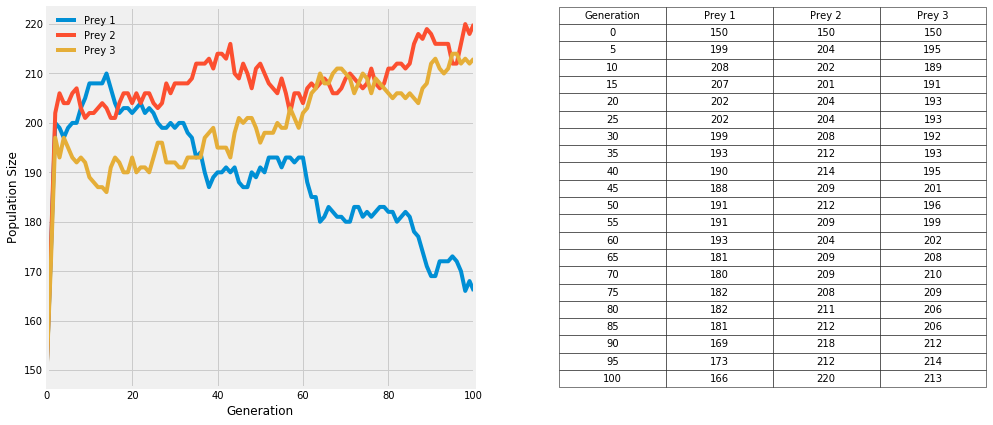

In [8]:
show_widget()

---

# Experiment 3 Widget

---

Notebook developed by: Andy Sheu

Data Science Modules: http://data.berkeley.edu/education/modules